In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer,mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)

In [2]:
df_por = pd.read_pickle('df_por-modelling-range_G3_5-repaired_G3_0_values.pkl')

df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1,1,18,1,1,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,2,3,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,1,17,1,1,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,1,15,1,0,1,1,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,1,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,1,1,15,1,1,1,4,2,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,2,4,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,1,1,16,1,1,1,3,3,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,2,4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


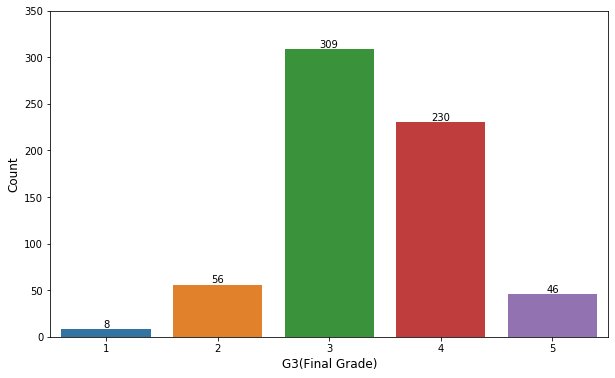

In [3]:
plt.figure(figsize = (10,6))
ax = sns.countplot(df_por['G3'])
plt.ylim(0,350)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 2,p.get_height(),ha = 'center')

## Oversampling

In [4]:
X = np.array(df_por.drop('G3',axis = 1))
y = np.array(df_por['G3'])

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [6]:
X_train.shape

(519, 43)

In [7]:
k_neighbors = [1,2,3,4,5]
model = LogisticRegression()
list_accuracies = []
list_X_train_shape = []

for n in k_neighbors:
    sm = SMOTE(k_neighbors = n,random_state = 42)
    X_sm,y_sm = sm.fit_resample(X_train,y_train)
    accuracies = cross_val_score(model,X_sm,y_sm,cv = 5)
    list_accuracies.append(accuracies)

In [8]:
list_accuracies

[array([0.57959184, 0.79183673, 0.7877551 , 0.79591837, 0.74693878]),
 array([0.57959184, 0.74285714, 0.73877551, 0.7877551 , 0.73877551]),
 array([0.56734694, 0.76326531, 0.75102041, 0.75102041, 0.72244898]),
 array([0.58367347, 0.76326531, 0.76326531, 0.77142857, 0.71836735]),
 array([0.59183673, 0.75102041, 0.78367347, 0.8       , 0.72244898])]

In [9]:
for i,accuracy in enumerate(list_accuracies):
    print('For k_neighbors = {} the Mean is {:0.2f} and the Standard Deviation {:0.2f}'.format(i + 1,list_accuracies[i].mean(),
                                                                                               list_accuracies[i].std()))

For k_neighbors = 1 the Mean is 0.74 and the Standard Deviation 0.08
For k_neighbors = 2 the Mean is 0.72 and the Standard Deviation 0.07
For k_neighbors = 3 the Mean is 0.71 and the Standard Deviation 0.07
For k_neighbors = 4 the Mean is 0.72 and the Standard Deviation 0.07
For k_neighbors = 5 the Mean is 0.73 and the Standard Deviation 0.07


In [10]:
sm = SMOTE(k_neighbors = 3,random_state = 42)
X_train,y_train = sm.fit_resample(X_train,y_train)

In [11]:
X_train.shape

(1225, 43)

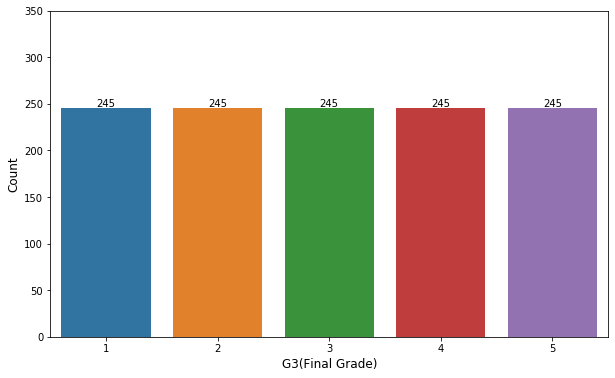

In [12]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y_train)
plt.ylim(0,350)
plt.xlabel('G3(Final Grade)',fontsize = 12)
plt.ylabel('Count',fontsize = 12)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,p.get_height() + 2,p.get_height(),ha = 'center')